<a href="https://colab.research.google.com/github/BoHye0202/Kaggle/blob/main/Fruit_Image_Classification(Vgg16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Load

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"choibohye","key":"b82e31a50310da16da34248c963dfa0b"}'}

In [2]:
ls -1ha kaggle.json

kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        159           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        291           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        879            True  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       5337           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      42633            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      11134            True  
connectx

In [4]:
!kaggle datasets download -d moltean/fruits

 99% 749M/760M [00:05<00:00, 111MB/s]
100% 760M/760M [00:05<00:00, 144MB/s]


In [5]:
!unzip fruits.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating:

# 데이터 정리

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil
from PIL import Image

In [7]:
train_url = '/content/fruits-360/Training'
test_url = '/content/fruits-360/Test'

apple = ['Apple Red 1', 'Apple Red 2', 'Apple Red 3']
tomato = ['Tomato 1', 'Tomato 2','Tomato 3','Tomato 4']

def change(url, name, k):
  i = 1
  os.makedirs(url+name)
  for folder_name in k:
    folder = os.listdir(url+'/'+folder_name)
    print(folder_name, len(folder))
    for file in folder:
      now = os.path.join(url+'/'+folder_name+'/', file)
      new = str(i) +'.jpg'
      new = os.path.join(url+'/'+folder_name+'/', new)
      os.rename(now, new)
      i += 1
      shutil.copy(new, url+name+'/')

change(train_url, '/Apple', apple)
change(test_url, '/Apple', apple)

change(train_url, '/Tomato', tomato)
change(test_url, '/Tomato', tomato)

Apple Red 1 492
Apple Red 2 492
Apple Red 3 429
Apple Red 1 164
Apple Red 2 164
Apple Red 3 144
Tomato 1 738
Tomato 2 672
Tomato 3 738
Tomato 4 479
Tomato 1 246
Tomato 2 225
Tomato 3 246
Tomato 4 160


# 데이터 전처리

In [8]:
classes= ['Apple', 'Avocado', 'Banana', 'Blueberry', 'Lemon', 'Mango', 'Orange', 'Peach', 'Pineapple', 'Potato Sweet', 'Strawberry', 'Tomato']

def label(name):
  l = {'Apple':0, 'Avocado':1, 'Banana':2, 'Blueberry':3, 'Lemon':4, 'Mango':5, 'Orange':6, 'Peach':7, 'Pineapple':8, 'Potato Sweet':9, 'Strawberry':10, 'Tomato':11}
  return l[name]

In [9]:
# y_test = []

# idx = 1
# os.makedirs('/content/fruits-360/Test/Test')

# for i in classes:
#   url = test_url+'/'+i

#   y_test.append([label(i) for _ in range(len(os.listdir(url)))])
#   print(i, len(os.listdir(url)))

#   for file in os.listdir(url):
#     now = os.path.join(url+'/', file)
#     new = str(idx) + '.jpg'
#     new = os.path.join(url+'/', new)
#     os.rename(now, new)
#     idx += 1
#     shutil.copy(new, '/content/fruits-360/Test/Test/')
#   print(i, len(os.listdir('/content/fruits-360/Test/Test')),'\n')

In [10]:
# y_test = sum(y_test,[])
# print(len(y_test))
# print(len(os.listdir('/content/fruits-360/Test/Test')))

In [11]:
X_train = []
y_train = []

img_size = 100
for i in classes:
  url = train_url +'/' + i
  k = len(os.listdir(url))
  y_train.append([label(i) for _ in range(k)])
  print('Number of y_train data: ', i, k)

  for img in os.listdir(url):
    img = url+'/'+img
    image = Image.open(img)
    data = np.asarray(image)
    data = data / 255.0 # Normalization

    X_train.append(data)

y_train = sum(y_train, [])
print('\nNumber of Training Images and Shape: ', np.shape(X_train))
print('Number of Training label: ', len(y_train))

Number of y_train data:  Apple 1413
Number of y_train data:  Avocado 427
Number of y_train data:  Banana 490
Number of y_train data:  Blueberry 462
Number of y_train data:  Lemon 492
Number of y_train data:  Mango 490
Number of y_train data:  Orange 479
Number of y_train data:  Peach 492
Number of y_train data:  Pineapple 490
Number of y_train data:  Potato Sweet 450
Number of y_train data:  Strawberry 492
Number of y_train data:  Tomato 2627

Number of Training Images and Shape:  (8804, 100, 100, 3)
Number of Training label:  8804


In [12]:
X_test = []
y_test = []

img_size = []
for i in classes:
  url = test_url + '/' + i
  k = len(os.listdir(url))
  y_test.append([label(i) for _ in range(k)])
  print('Number of y_test data: ', i, k)

  for img in os.listdir(url):
    img = url + '/' + img
    image = Image.open(img)
    data= np.asarray(image)
    data = data/255.0

    X_test.append(data)

y_test = sum(y_test, [])
print('\nNumber of Test Images and Shape: ', np.shape(X_test))
print('Number of Test label: ', len(y_test))

Number of y_test data:  Apple 472
Number of y_test data:  Avocado 143
Number of y_test data:  Banana 166
Number of y_test data:  Blueberry 154
Number of y_test data:  Lemon 164
Number of y_test data:  Mango 166
Number of y_test data:  Orange 160
Number of y_test data:  Peach 164
Number of y_test data:  Pineapple 166
Number of y_test data:  Potato Sweet 150
Number of y_test data:  Strawberry 164
Number of y_test data:  Tomato 877

Number of Test Images and Shape:  (2946, 100, 100, 3)
Number of Test label:  2946


# Model

In [13]:
from sklearn.model_selection import  train_test_split
import tensorflow as tf

X_train = np.array(X_train)
# y_train = np.array(y_train)
X_test = np.array(X_test)
# y_test = np.array(y_test)
# X_train = X_train.reshape(-1, img_size, img_size, 3)


y_train=tf.keras.utils.to_categorical(y_train,num_classes=12)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=12)

x_train,x_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2,random_state=42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(7043, 100, 100, 3) (1761, 100, 100, 3) (7043, 12) (1761, 12)


In [14]:
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [15]:
# Vgg16모델의 filter는 64-128-256-512-512-4096(dense) 크기였으나 수정하여 진행

epochs=30
batch_size=32

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(12,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 8)       584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0

In [16]:
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
220/220 [==============================] - 35s 85ms/step - loss: 1.9071 - accuracy: 0.3637 - val_loss: 1.4145 - val_accuracy: 0.5099
Epoch 2/30
220/220 [==============================] - 18s 84ms/step - loss: 1.4382 - accuracy: 0.4601 - val_loss: 1.2570 - val_accuracy: 0.5020
Epoch 3/30
220/220 [==============================] - 19s 84ms/step - loss: 1.2145 - accuracy: 0.5170 - val_loss: 0.9881 - val_accuracy: 0.5667
Epoch 4/30
220/220 [==============================] - 18s 84ms/step - loss: 1.0613 - accuracy: 0.5558 - val_loss: 0.8894 - val_accuracy: 0.5826
Epoch 5/30
220/220 [==============================] - 19s 84ms/step - loss: 0.9512 - accuracy: 0.5809 - val_loss: 0.9502 - val_accuracy: 0.5281
Epoch 6/30
220/220 [==============================] - 18s 84ms/step - loss: 0.9085 - accuracy: 0.6038 - val_loss: 0.6749 - val_accuracy: 0.6576
Epoch 7/30
220/220 [==============================] - 18s 84ms/step - loss: 1.0057 - accuracy: 0.5765 - val_loss: 0.7104 - val_accuracy:

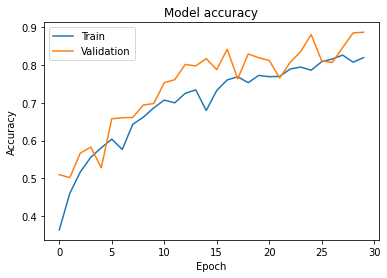

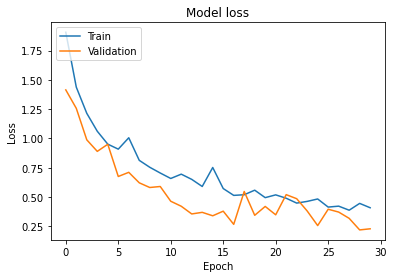

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Test

In [19]:
predict = model.predict(X_test)
model.evaluate(X_test, y_test, verbose = 1)

93/93 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.8486


[0.3141006827354431, 0.8486082553863525]

In [20]:
def Name(name):
  l = {0:'Apple', 1:'Avocado', 2:'Banana', 3:'Blueberry', 4:'Lemon', 5:'Mango', 6:'Orange', 7:'Peach', 8:'Pineapple', 9:'Potato Sweet', 10:'Strawberry', 11:'Tomato'}
  return l[name]

result = []
labels = np.argmax(predict, axis=1)
for i in labels:
  result.append(Name(i))
print(len(result), set(result))

2946 {'Lemon', 'Banana', 'Peach', 'Potato Sweet', 'Strawberry', 'Mango', 'Orange', 'Tomato', 'Pineapple', 'Apple'}


In [22]:
sub = pd.read_csv('/content/test_answer_sample_.csv')
sub['answer value'] = result
sub.to_csv('result.csv', index=False)
sub

,Unnamed: 0,answer value
0,0,Apple
1,1,Apple
2,2,Apple
3,3,Apple
4,4,Apple
...,...,...
2941,2941,Tomato
2942,2942,Tomato
2943,2943,Tomato
2944,2944,Tomato


# ResNet50 - 전이

In [23]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# 클래스의 개수 정의
num_classes = 12

# EARLY_STOP_PATIENCE < NUM_EPOCHS
NUM_EPOCHS = 30
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

# 테스트 배치의 개수
BATCH_SIZE_TESTING = 1

In [24]:
# 모델 제작
input_data = Input(shape=(100,100,3))

# resnet = Sequential()
# resnet.add(ResNet50(input_tensor=input, weights=resnet_weights,include_top = False, pooling = 'max')) 
# resnet.add(Dense(num_classes, activation = 'softmax'))
resnet = ResNet50(input_tensor=input_data, weights='imagenet', include_top=False, pooling = 'avg')

# # 이미 학습된 영역은 학습하지 않겠다고 설정하는 옵션 
resnet.layers[0].trainable = False
# for layer in resnet.layers:
#     layer.trainable = False

x = resnet.output
x = Dense(12, activation='softmax')(x)

94773248/94765736 [==============================] - 1s 0us/step


In [25]:
resnet_model = Model(resnet.input, x)
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [26]:
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

#compile the model
resnet_model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


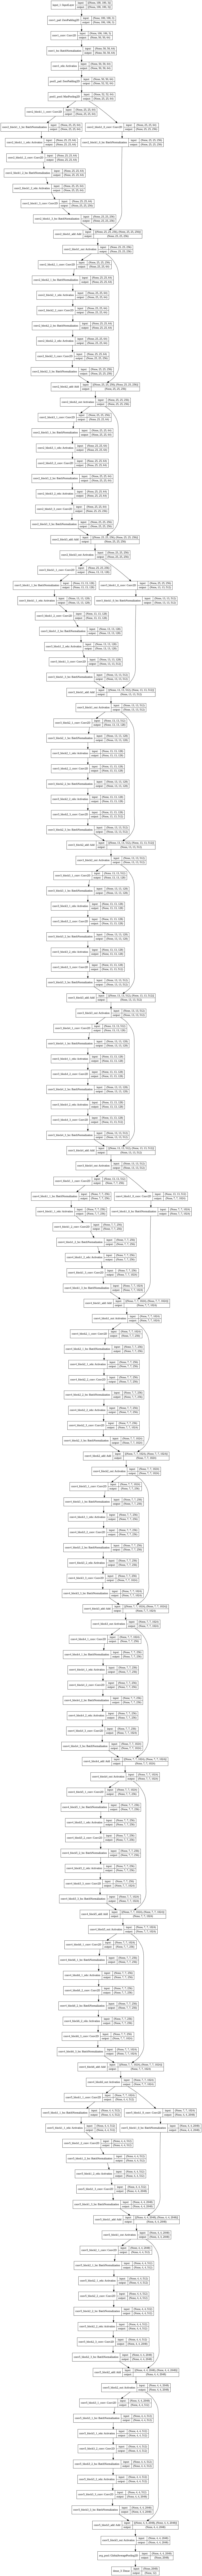

In [27]:
SVG(model_to_dot(resnet_model).create(prog='dot', format='svg'))
plot_model(resnet_model, to_file='model.png',show_shapes=True)

In [28]:
datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                           featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=True, #divide input datas to std
                           samplewise_std_normalization=True,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=True,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history_resnet = resnet_model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
220/220 [==============================] - 32s 116ms/step - loss: 0.6366 - accuracy: 0.7986 - val_loss: 100.8383 - val_accuracy: 0.0596
Epoch 2/30
220/220 [==============================] - 24s 109ms/step - loss: 0.2601 - accuracy: 0.9204 - val_loss: 158.2794 - val_accuracy: 0.0596
Epoch 3/30
220/220 [==============================] - 24s 108ms/step - loss: 0.1639 - accuracy: 0.9474 - val_loss: 86.2309 - val_accuracy: 0.0574
Epoch 4/30
220/220 [==============================] - 24s 107ms/step - loss: 0.1430 - accuracy: 0.9551 - val_loss: 956.3182 - val_accuracy: 0.2998
Epoch 5/30
220/220 [==============================] - 24s 108ms/step - loss: 0.1059 - accuracy: 0.9652 - val_loss: 168.3687 - val_accuracy: 0.2998
Epoch 6/30
220/220 [==============================] - 24s 108ms/step - loss: 0.1180 - accuracy: 0.9612 - val_loss: 3434.1641 - val_accuracy: 0.2998
Epoch 7/30
220/220 [==============================] - 24s 108ms/step - loss: 0.1838 - accuracy: 0.9465 - val_loss: 194

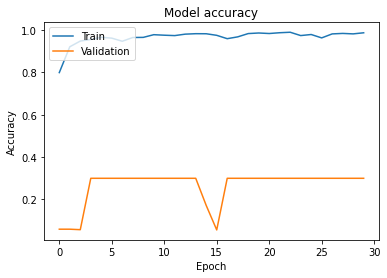

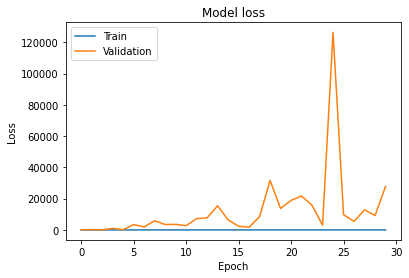

In [29]:
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Kaggle

In [ ]:
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(12,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=30
batch_size=32

In [ ]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Kaggle-Test

In [ ]:
predict = model.predict(X_test)
model.evaluate(X_test, y_test, verbose = 1)

In [ ]:
def Name(name):
  l = {0:'Apple', 1:'Avocado', 2:'Banana', 3:'Blueberry', 4:'Lemon', 5:'Mango', 6:'Orange', 7:'Peach', 8:'Pineapple', 9:'Potato Sweet', 10:'Strawberry', 11:'Tomato'}
  return l[name]

result = []
labels = np.argmax(predict, axis=1)
for i in labels:
  result.append(Name(i))

real= []
reals = np.argmax(y_test, axis = 1)
for r in reals:
  real.append(Name(r))

print(len(result), set(result))
print(len(real), set(real))

In [ ]:
sub = pd.read_csv('/content/test_answer_sample_.csv')
sub['answer value'] = result
sub['real'] = real
sub.to_csv('result.csv', index=False)
sub